# Carga de datos

In [64]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

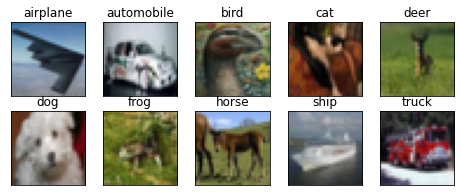

In [65]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

In [66]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

# Utilidades
En esta sección se ejecutan todas las funciones que contienen las utilidades que se emplearán en la fase de experimentación

## Dibujo de gráficas
La primera función sirve para dibujar las gráficas con el historial de entrenamiento

In [67]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

## Creación de modelos
A continuación se definen las funciones necesarias para la creación de los modelos que se utilizarán en la experimentación.

In [70]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import experimental

def build_model_v1(dout=True, bn=True):
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(128))
    if bn:
        model.add(BatchNormalization())
    if dout:
        model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(128))
    if bn:
        model.add(BatchNormalization())
    if dout:
        model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def build_model_v2(dout=True, bn=True):
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(128))
    if bn:
        model.add(BatchNormalization())
    if dout:
        model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    if bn:
        model.add(BatchNormalization())
    if dout:
        model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(32))
    if bn:
        model.add(BatchNormalization())
    if dout:
        model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(BatchNormalization())
    if dout:
        model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def build_model_v3(dout=True, bn=True):
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(1024))
    if bn:
        model.add(BatchNormalization())
    if dout:
        model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(512))
    if bn:
        model.add(BatchNormalization())
    if dout:
        model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(BatchNormalization())
    if dout:
        model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    if bn:
        model.add(BatchNormalization())
    if dout:
        model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model


def create_block(block_input, n_filtros, bn, bn_before):
    x = block_input
    for i in range(2):
        x = Conv2D(n_filtros, kernel_size=(3,3), padding="same")(x)
        if bn and bn_before:
            x = BatchNormalization()(x)
        x = Activation("relu")(x)
        if bn and not bn_before:
            x = BatchNormalization()(x)
    return x

def build_conv1(dout=True, bn=True, bn_before=True, extra_layer=False): # De https://www.kaggle.com/mahtabshaan/autoencoder-as-feature-extractor-cifar10
    net_input = Input((32,32,3))
    x = net_input 
    #x = experimental.preprocessing.Rescaling(1./255)(x)
    #x = experimental.preprocessing.RandomRotation(0.2)(x)
    #x = experimental.preprocessing.RandomZoom(.2)(x)
    #x = experimental.preprocessing.RandomFlip("horizontal")(x)

    block1 = create_block(x, 32, bn, bn_before)
    x = MaxPooling2D(pool_size=(2, 2))(block1)
    if dout:
        x = Dropout(0.2)(x)

    block2 = create_block(x, 64, bn, bn_before)
    x = MaxPooling2D(pool_size=(2, 2))(block2)
    if dout:
        x = Dropout(0.3)(x)

    block3 = create_block(x, 128, bn, bn_before)
    x = MaxPooling2D(pool_size=(2, 2))(block3)
    if dout:
        x = Dropout(0.3)(x)

    x = Flatten()(x)
    if extra_layer:
        x = Dense(2048)(x)
    output = Dense(10, activation='softmax')(x)
    return Model(net_input, output)


# Experimentación
## Modelo ffNN 1
### Incluyendo capas de dropout y batch normalization

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_41 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_41 (RandomRo (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_41 (RandomZoom)  (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_41 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_52 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_133 (Dense)            (None, 128)               393344    
_________________________________________________________________
batch_normalization_210 (Bat (None, 128)             

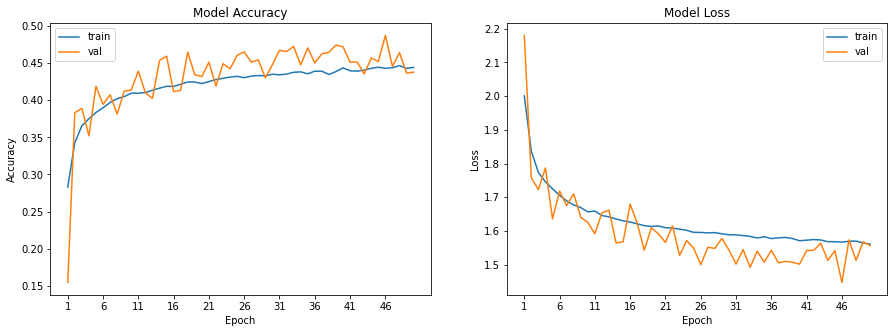

Training MLP took 232.05204224586487 seconds


In [81]:
model = build_model_v1()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### Con capa de dropout pero sin batch normalization

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_42 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_42 (RandomRo (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_42 (RandomZoom)  (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_42 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_53 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_136 (Dense)            (None, 128)               393344    
_________________________________________________________________
dropout_109 (Dropout)        (None, 128)             

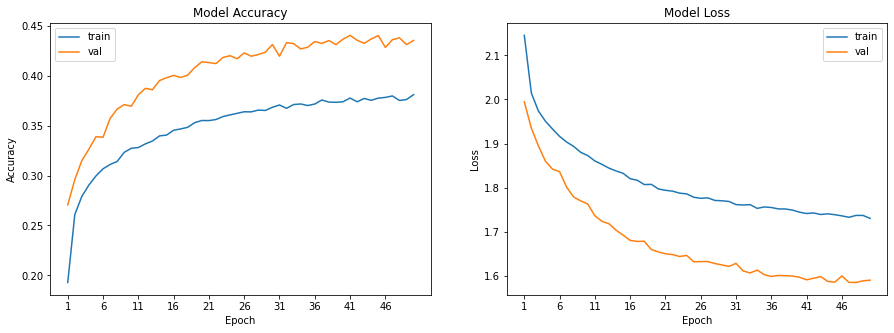

Training MLP took 213.21921491622925 seconds


In [82]:
model = build_model_v1(bn=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### Con capa de batch normalization pero sin dropout

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_43 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_43 (RandomRo (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_43 (RandomZoom)  (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_43 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_54 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_139 (Dense)            (None, 128)               393344    
_________________________________________________________________
batch_normalization_212 (Bat (None, 128)             

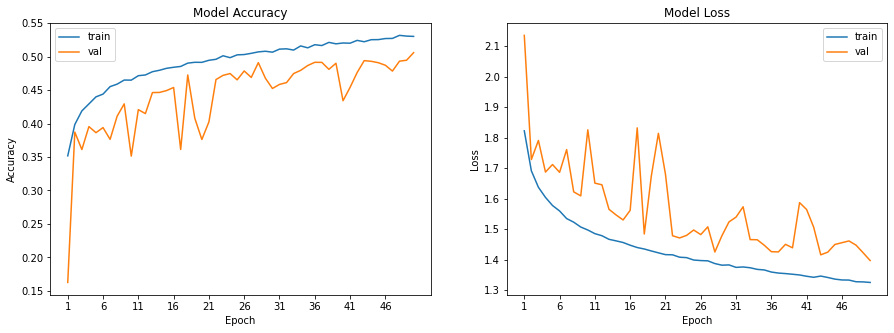

Training MLP took 211.69301009178162 seconds


In [83]:
model = build_model_v1(dout=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

## Modelo ffNN 2
### Incluyendo capas de dropout y batch normalization

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_44 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_44 (RandomRo (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_44 (RandomZoom)  (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_44 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_55 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_142 (Dense)            (None, 128)               393344    
_________________________________________________________________
batch_normalization_214 (Bat (None, 128)             

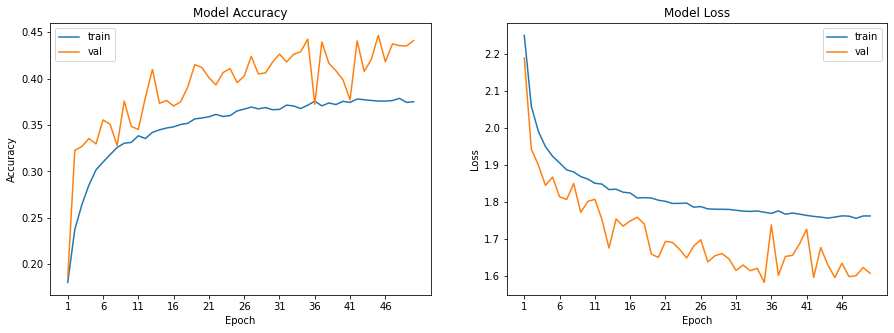

Training MLP took 226.78100061416626 seconds


In [84]:
model = build_model_v2()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### Incluyendo capas de dropout, pero sin batch normalization

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_45 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_45 (RandomRo (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_45 (RandomZoom)  (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_45 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_56 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_147 (Dense)            (None, 128)               393344    
_________________________________________________________________
dropout_115 (Dropout)        (None, 128)             

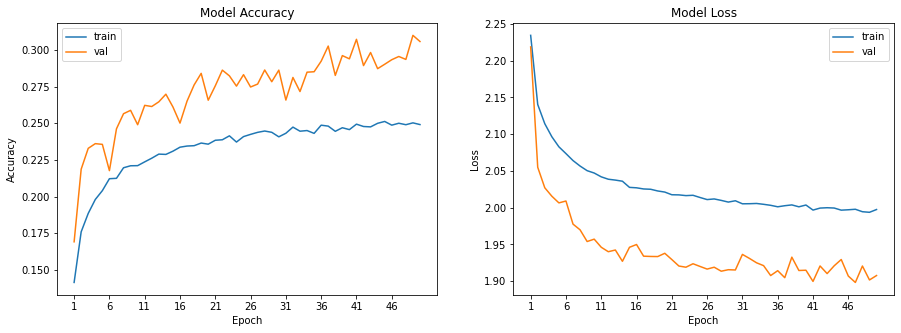

Training MLP took 210.7387719154358 seconds


In [85]:
model = build_model_v2(bn=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### Incluyendo capas de batch normalization, pero sin dropout

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_46 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_46 (RandomRo (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_46 (RandomZoom)  (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_46 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_57 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_152 (Dense)            (None, 128)               393344    
_________________________________________________________________
batch_normalization_219 (Bat (None, 128)             

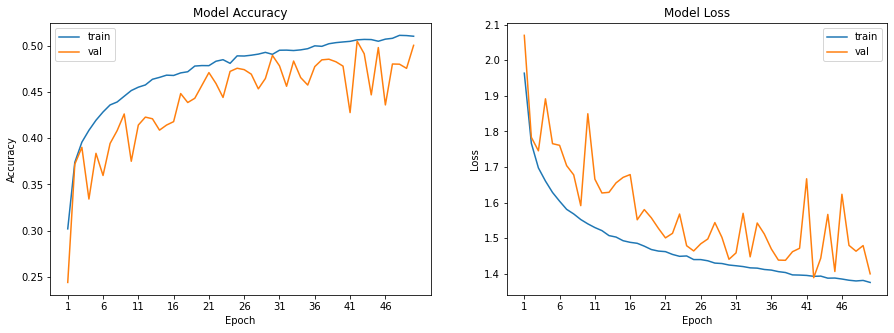

Training MLP took 215.06497025489807 seconds


In [86]:
model = build_model_v2(dout=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

## Modelo ffNN 3
### Incluyendo capas de dropout y batch normalization

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_47 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_47 (RandomRo (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_47 (RandomZoom)  (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_47 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_58 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_157 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_223 (Bat (None, 1024)            

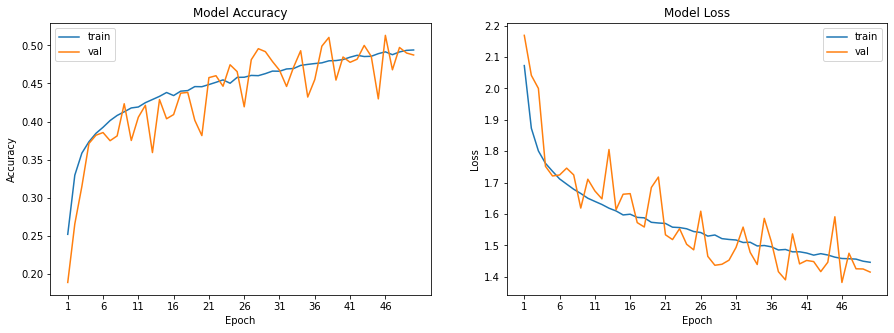

Training MLP took 651.9230682849884 seconds


In [87]:
model = build_model_v3()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### Incluyendo capas de dropout, pero sin batch normalization

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_48 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_48 (RandomRo (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_48 (RandomZoom)  (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_48 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_59 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_162 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_123 (Dropout)        (None, 1024)            

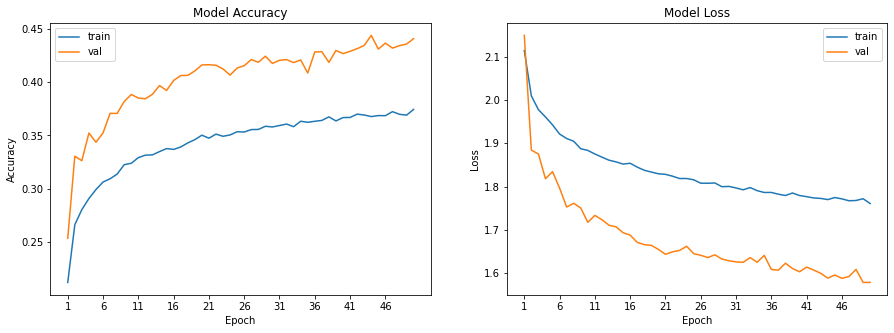

Training MLP took 586.0059037208557 seconds


In [88]:
model = build_model_v3(bn=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### Incluyendo capas de batch normalization, pero sin dropout

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_49 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_49 (RandomRo (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_49 (RandomZoom)  (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_49 (RandomFlip)  (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_60 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_167 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_228 (Bat (None, 1024)            

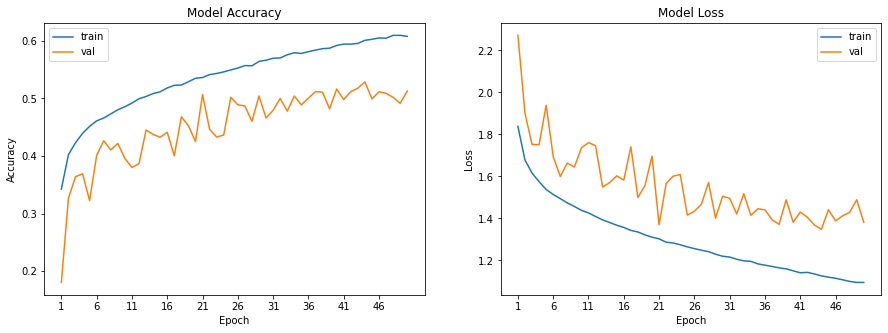

Training MLP took 566.1155211925507 seconds


In [89]:
model = build_model_v3(dout=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

## Red convolucional
En la experimentación con la red neuronal hay muchas variables que afectan al desempeño:
- Incluir capa de dropout o no
- Incluir capa de batch normalization antes o despues de la de activación, o simplemente no inlcuirla
- Incluir una capa extra o no.
Para no perder eficiencia del modelo se comprobó su desempeño con casi todas las combinaciones de configuraciones posibles (se excluyeron aquellas en las que no hay capa de dropout ni capa de batch normalization). Para entender en cada sección de esta experimentación que configuración tiene el modelo entrenado se incluye en el titulo de la sección los valores que toman cada una de las 3 variables mencionadas.

### dropput=si, batch_normalization=despues, capa_extra=no

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_162 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_221 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_163 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_222 (Activation)  (None, 32, 32, 32)        0  

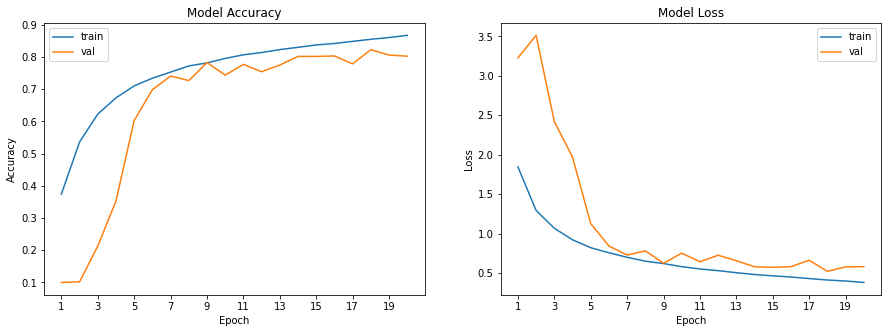

Training MLP took 4681.244248628616 seconds


In [71]:
import keras.backend as K
import time

model = build_conv1(dout=True, bn=True, bn_before=True, extra_layer=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### dropput=si, batch_normalization=antes, capa_extra=no

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_227 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_168 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_228 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_169 (Bat (None, 32, 32, 32)        128

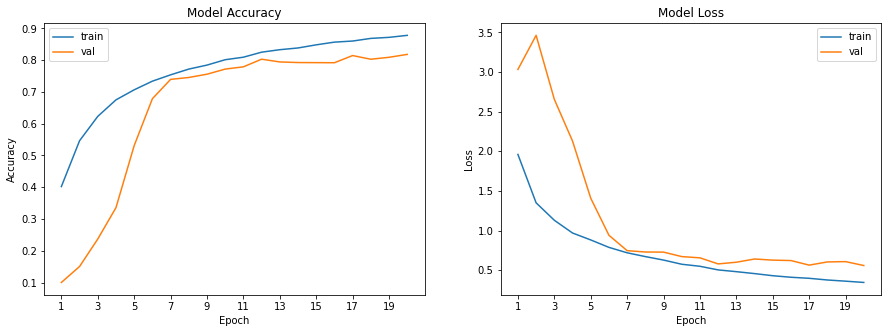

Training MLP took 5196.813507318497 seconds


In [72]:
model = build_conv1(dout=True, bn=True, bn_before=False, extra_layer=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### dropput=si, batch_normalization=no, capa_extra=no

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_233 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_234 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_95 (Dropout)         (None, 16, 16, 32)        0  

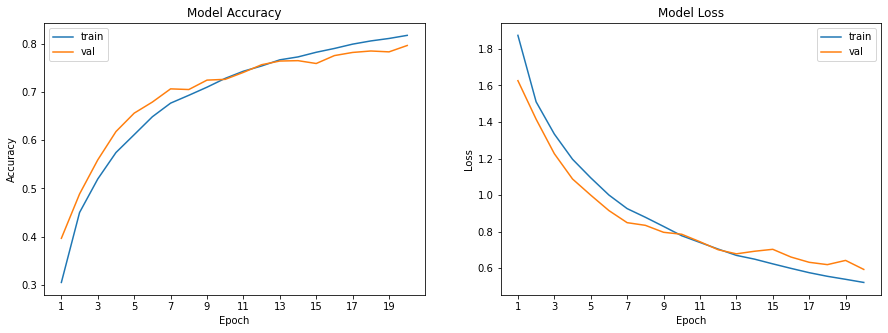

Training MLP took 2428.5012600421906 seconds


In [73]:
model = build_conv1(dout=True, bn=False, extra_layer=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### dropput=no, batch_normalization=despues, capa_extra=no

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_174 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_239 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_175 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_240 (Activation)  (None, 32, 32, 32)        0  

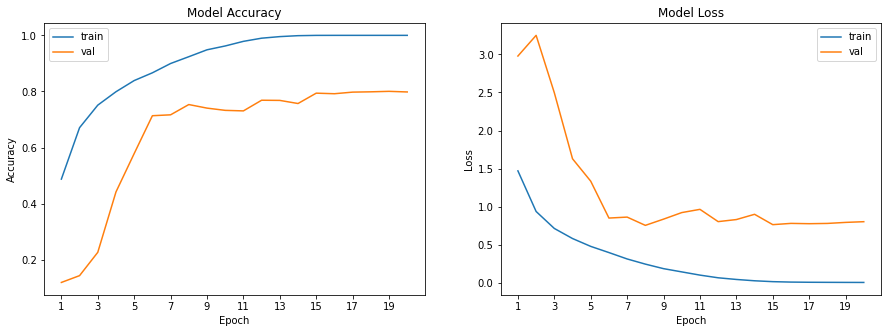

Training MLP took 4637.939530134201 seconds


In [74]:
model = build_conv1(dout=False, bn=True, bn_before=True, extra_layer=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### dropput=no, batch_normalization=antes, capa_extra=no

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_245 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_180 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_246 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_181 (Bat (None, 32, 32, 32)        128

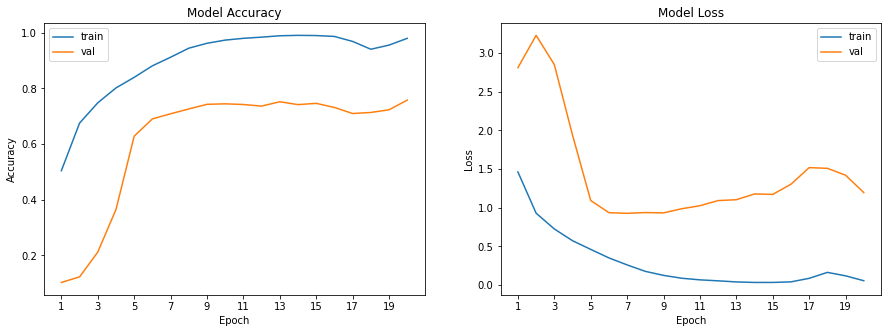

Training MLP took 4822.8211834430695 seconds


In [75]:
model = build_conv1(dout=False, bn=True, bn_before=False, extra_layer=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### dropput=si, batch_normalization=despues, capa_extra=si

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_186 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_251 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_187 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_252 (Activation)  (None, 32, 32, 32)        0  

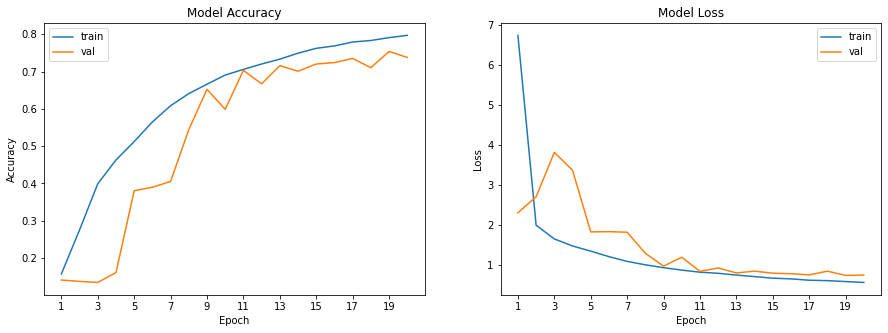

Training MLP took 4287.035219669342 seconds


In [76]:
model = build_conv1(dout=True, bn=True, bn_before=True, extra_layer=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### dropput=si, batch_normalization=antes, capa_extra=si

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_257 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_192 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_258 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_193 (Bat (None, 32, 32, 32)        128

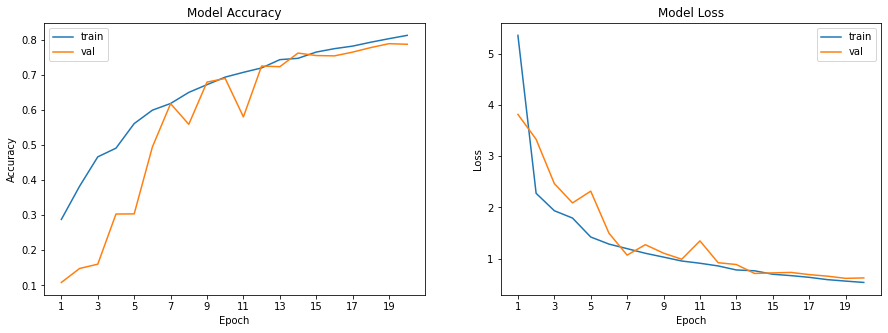

Training MLP took 3084.4385986328125 seconds


In [77]:
model = build_conv1(dout=True, bn=True, bn_before=False, extra_layer=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### dropput=si, batch_normalization=no, capa_extra=si


Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_263 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_264 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_104 (Dropout)        (None, 16, 16, 32)        0  

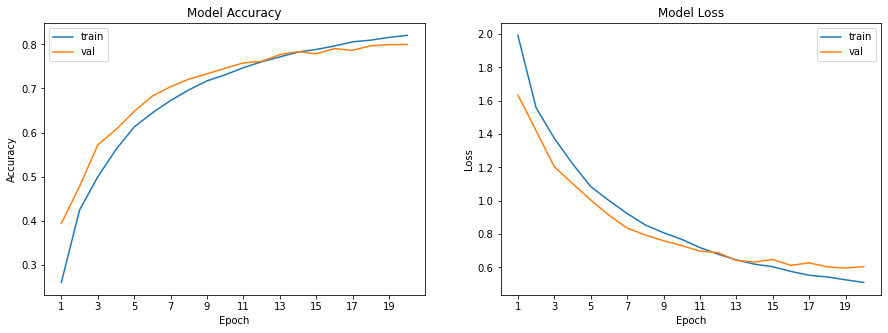

Training MLP took 1588.1940002441406 seconds


In [78]:
model = build_conv1(dout=True, bn=False, extra_layer=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### dropput=no, batch_normalization=despues, capa_extra=si

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_198 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_269 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_199 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_270 (Activation)  (None, 32, 32, 32)        0  

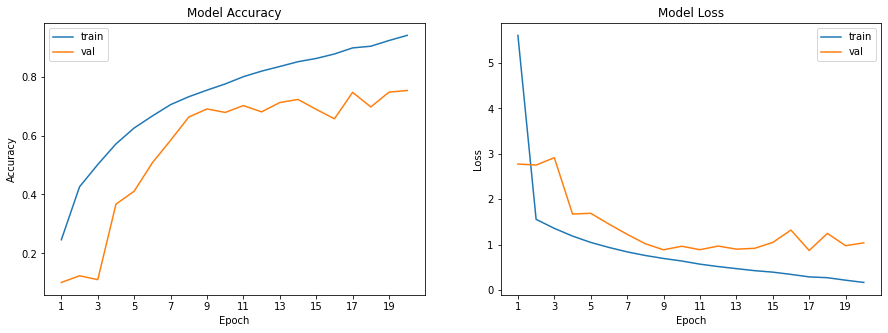

Training MLP took 3025.1649990081787 seconds


In [79]:
model = build_conv1(dout=False, bn=True, bn_before=True, extra_layer=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

### dropput=no, batch_normalization=antes, capa_extra=si

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_275 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_204 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_276 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_205 (Bat (None, 32, 32, 32)        128

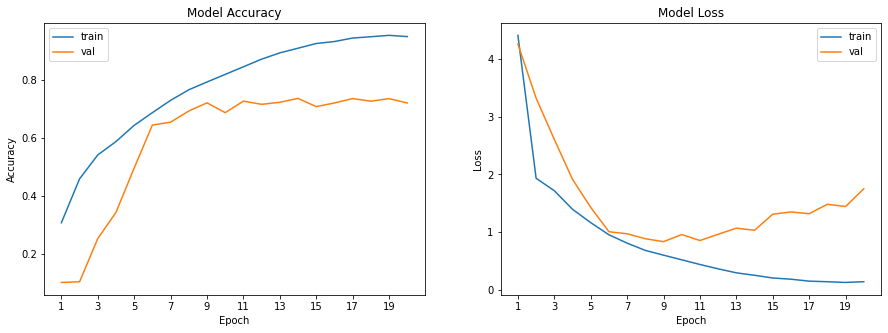

Training MLP took 2935.2550008296967 seconds


In [80]:
model = build_conv1(dout=False, bn=True, bn_before=False, extra_layer=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")